In [ ]:
#Class 1: Burger

In [ ]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt

DIR ='C:\Yelp\Train'

# Want to know how we should format the height x width image data dimensions
# for inputting to a keras model
def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            data = np.array(Image.open(path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))
get_size_statistics()

In [16]:
def label_img(name):
    word_label = name.split('(')[0]
    #print(word_label)
    if word_label == 'Burger ':  return 0
    elif word_label == 'pizza ': return 1
    elif word_label == 'Chicken ': return 1
    elif word_label == 'Sweet ': return 1
    elif word_label == 'Tacos ': return 1
    elif word_label == 'Drink ': return 1

In [17]:
IMG_SIZE = 256
def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
            X_train=np.array(img)
            Y_train=label
    shuffle(train_data)
    return train_data

In [18]:
train_data = np.array(load_training_data())
y=len(train_data)
X=[]
Y=[]

In [19]:
for i in range(y-1):
    img=np.array((train_data[i][0]).reshape(256,256))
    X.append(img)
    label=np.array(train_data[i][1])
    Y.append(label)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    random_state=42,
                                                    test_size=0.20)

In [21]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(286, 256, 256)
(72, 256, 256)
(286,)
(72,)


In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
from keras.utils import to_categorical
import numpy as np

In [24]:
classifier=Sequential()
classifier.add(Conv2D(64,3,3,input_shape=(256,256,1),activation='relu'))
classifier.add(Conv2D(32,3,3,activation='relu'))
#classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(output_dim=2,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

D:\Python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(256, 256,..., activation="relu")`
  
D:\Python\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Python\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=2)`
  


In [25]:
X_train = X_train.reshape(286,256,256,1)
X_test = X_test.reshape(72,256,256,1)
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 64)      640       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 252, 252, 32)      18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2032128)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 4064258   
Total params: 4,083,362
Trainable params: 4,083,362
Non-trainable params: 0
_________________________________________________________________


In [27]:
classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 286 samples, validate on 72 samples
Epoch 1/3
286/286 [==============================] - 62s 215ms/step - loss: 0.7803 - acc: 0.2762 - val_loss: 0.6931 - val_acc: 0.3056
Epoch 2/3
286/286 [==============================] - 63s 220ms/step - loss: 0.6931 - acc: 0.2692 - val_loss: 0.6931 - val_acc: 0.3056
Epoch 3/3
286/286 [==============================] - 65s 226ms/step - loss: 0.6931 - acc: 0.2692 - val_loss: 0.6931 - val_acc: 0.3056


In [28]:
classifier.evaluate(X_test, y_test)

72/72 [==============================] - 7s 90ms/step


[0.6931471824645996, 0.3055555555555556]

In [29]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(256,256,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 127, 127, 32)      128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 96)        55392     
__________

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [35]:
model.fit(X_train,y_train,epochs = 10, validation_steps=None,verbose = 1,batch_size=50)

Epoch 1/10
286/286 [==============================] - 50s 176ms/step - loss: 0.0945 - acc: 0.9685
Epoch 2/10
286/286 [==============================] - 43s 152ms/step - loss: 0.1026 - acc: 0.9650
Epoch 3/10
286/286 [==============================] - 42s 147ms/step - loss: 0.1086 - acc: 0.9615
Epoch 4/10
286/286 [==============================] - 41s 142ms/step - loss: 0.1299 - acc: 0.9545
Epoch 5/10
286/286 [==============================] - 41s 143ms/step - loss: 0.1096 - acc: 0.9650
Epoch 6/10
286/286 [==============================] - 41s 142ms/step - loss: 0.0799 - acc: 0.9860
Epoch 7/10
286/286 [==============================] - 41s 143ms/step - loss: 0.0262 - acc: 0.9930
Epoch 8/10
286/286 [==============================] - 43s 151ms/step - loss: 0.0349 - acc: 0.9895
Epoch 9/10
286/286 [==============================] - 44s 152ms/step - loss: 0.0087 - acc: 1.0000
Epoch 10/10
286/286 [==============================] - 46s 161ms/step - loss: 0.0300 - acc: 0.9895


In [36]:
model.evaluate(X_test, y_test)

72/72 [==============================] - 2s 30ms/step


[1.0643285711606343, 0.7222222222222222]

In [37]:
loss,acc = model.evaluate(X_test, y_test, verbose = 0)
print(acc * 100)

72.22222222222221


In [39]:
predictions

array([[1.64508820e-05, 9.38421607e-01],
       [3.14071774e-03, 4.70596850e-02],
       [6.37763500e-01, 1.24543905e-04],
       [2.87970364e-01, 1.63912773e-04],
       [6.59001350e-01, 1.60634518e-04],
       [3.48001719e-04, 3.95758152e-01],
       [2.16012597e-02, 1.99959546e-01],
       [2.57045031e-04, 6.19734347e-01],
       [4.58657742e-05, 7.04783440e-01],
       [2.68220901e-07, 9.70463455e-01],
       [2.30112672e-03, 4.58062410e-01],
       [1.98676288e-02, 4.15462554e-02],
       [1.76241994e-03, 1.47605985e-01],
       [1.06828660e-01, 1.51693821e-04],
       [9.05409455e-03, 2.51138210e-02],
       [1.22898817e-03, 1.74040258e-01],
       [7.65944123e-02, 3.57246399e-03],
       [1.58919245e-01, 1.07288361e-05],
       [1.76185369e-03, 2.99904943e-01],
       [1.07698143e-02, 5.65637648e-02],
       [1.04010105e-05, 9.30260658e-01],
       [4.83691692e-05, 7.85287499e-01],
       [1.78763270e-03, 4.67881292e-01],
       [5.45272231e-03, 5.35265088e-01],
       [1.561992

In [38]:
predictions=model.predict(X_test)

In [40]:
Pred_Max_Positions=[]
for i in range(72):
    res=max(predictions[i])
    #print(res)
    for j in range(2):
        if (res==predictions[i][j]):
            result=j+1
            Pred_Max_Positions.append(j)
#Pred_Max_Positions

In [42]:
Test_Max_Positions=[]
for i in range(72):
    res=max(y_test[i])
    #print(res)
    for j in range(2):
        if (res==y_test[i][j]):
            result=j
            Test_Max_Positions.append(j)
#Test_Max_Positions

In [43]:
from sklearn.metrics import confusion_matrix
CM_CNN_1=confusion_matrix(Test_Max_Positions,Pred_Max_Positions)
CM_CNN_1

array([[14,  8],
       [12, 38]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(Test_Max_Positions,Pred_Max_Positions))

              precision    recall  f1-score   support

           0       0.54      0.64      0.58        22
           1       0.83      0.76      0.79        50

   micro avg       0.72      0.72      0.72        72
   macro avg       0.68      0.70      0.69        72
weighted avg       0.74      0.72      0.73        72



In [ ]:
#Class 2: Pizza

In [47]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt

DIR = 'D:\SEM II\DSP\Project\Image Dataset\Train'

# Want to know how we should format the height x width image data dimensions
# for inputting to a keras model
def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            data = np.array(Image.open(path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))
get_size_statistics()

Average Height: 383.958217270195
Max Height: 400
Min Height: 150


Average Width: 482.1309192200557
Max Width: 600
Min Width: 200


In [48]:
def label_img(name):
    word_label = name.split('(')[0]
    #print(word_label)
    if word_label == 'Burger ':  return 1
    elif word_label == 'pizza ': return 0
    elif word_label == 'Chicken ': return 1
    elif word_label == 'Sweet ': return 1
    elif word_label == 'Tacos ': return 1
    elif word_label == 'Drink ': return 1

In [49]:
IMG_SIZE = 256
def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
            X_train=np.array(img)
            Y_train=label
    shuffle(train_data)
    return train_data

In [50]:
train_data = np.array(load_training_data())
y=len(train_data)
X=[]
Y=[]

In [51]:
for i in range(y-1):
    img=np.array((train_data[i][0]).reshape(256,256))
    X.append(img)
    label=np.array(train_data[i][1])
    Y.append(label)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    random_state=42,
                                                    test_size=0.20)

In [53]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [54]:
classifier=Sequential()
classifier.add(Conv2D(64,3,3,input_shape=(256,256,1),activation='relu'))
classifier.add(Conv2D(32,3,3,activation='relu'))
#classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(output_dim=2,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

D:\Python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(256, 256,..., activation="relu")`
  
D:\Python\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Python\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=2)`
  


In [55]:
X_train = X_train.reshape(286,256,256,1)
X_test = X_test.reshape(72,256,256,1)
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [56]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 254, 254, 64)      640       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 252, 252, 32)      18464     
_________________________________________________________________
flatten_4 (Flatten)          (None, 2032128)           0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 4064258   
Total params: 4,083,362
Trainable params: 4,083,362
Non-trainable params: 0
_________________________________________________________________


In [57]:
classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 286 samples, validate on 72 samples
Epoch 1/3
286/286 [==============================] - 62s 216ms/step - loss: 10.7019 - acc: 0.3287 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 2/3
286/286 [==============================] - 64s 224ms/step - loss: 11.7223 - acc: 0.2727 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 3/3
286/286 [==============================] - 66s 229ms/step - loss: 11.7223 - acc: 0.2727 - val_loss: 11.4170 - val_acc: 0.2917


In [58]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(256,256,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'sigmoid'))

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 127, 127, 32)      128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 60, 60, 96)        55392     
__________

In [60]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [61]:
model.fit(X_train,y_train,epochs = 10, validation_steps=None,verbose = 1,batch_size=50)

Epoch 1/10
286/286 [==============================] - 41s 142ms/step - loss: 0.5180 - acc: 0.7343
Epoch 2/10
286/286 [==============================] - 42s 147ms/step - loss: 0.3364 - acc: 0.8706
Epoch 3/10
286/286 [==============================] - 46s 160ms/step - loss: 0.1960 - acc: 0.9266
Epoch 4/10
286/286 [==============================] - 46s 160ms/step - loss: 0.1388 - acc: 0.9615
Epoch 5/10
286/286 [==============================] - 45s 156ms/step - loss: 0.0745 - acc: 0.9825
Epoch 6/10
286/286 [==============================] - 43s 150ms/step - loss: 0.0328 - acc: 0.9930
Epoch 7/10
286/286 [==============================] - 42s 147ms/step - loss: 0.0182 - acc: 0.9965
Epoch 8/10
286/286 [==============================] - 41s 144ms/step - loss: 0.0143 - acc: 0.9965
Epoch 9/10
286/286 [==============================] - 44s 155ms/step - loss: 0.0064 - acc: 1.0000
Epoch 10/10
286/286 [==============================] - 48s 167ms/step - loss: 0.0179 - acc: 0.9930


In [43]:
model.evaluate(X_test, y_test)

72/72 [==============================] - 3s 44ms/step


[0.38448719183603924, 0.9166666666666666]

In [44]:
loss,acc = model.evaluate(X_test, y_test, verbose = 0)
print(acc * 100)

91.66666666666666


In [62]:
predictions=model.predict(X_test)
Pred_Max_Positions=[]
for i in range(72):
    res=max(predictions[i])
    #print(res)
    for j in range(2):
        if (res==predictions[i][j]):
            result=j
            Pred_Max_Positions.append(j)
#Pred_Max_Positions

Test_Max_Positions=[]
for i in range(72):
    res=max(y_test[i])
    #print(res)
    for j in range(2):
        if (res==y_test[i][j]):
            result=j
            Test_Max_Positions.append(j)
#Test_Max_Positions

from sklearn.metrics import classification_report
print(classification_report(Test_Max_Positions,Pred_Max_Positions))

from sklearn.metrics import confusion_matrix
CM_CNN_2=confusion_matrix(Test_Max_Positions,Pred_Max_Positions)
CM_CNN_2



              precision    recall  f1-score   support

           0       0.93      0.67      0.78        21
           1       0.88      0.98      0.93        51

   micro avg       0.89      0.89      0.89        72
   macro avg       0.91      0.82      0.85        72
weighted avg       0.89      0.89      0.88        72



array([[14,  7],
       [ 1, 50]], dtype=int64)

In [63]:
#Chicken

In [64]:
def label_img(name):
    word_label = name.split('(')[0]
    #print(word_label)
    if word_label == 'Burger ':  return 1
    elif word_label == 'pizza ': return 1
    elif word_label == 'Chicken ': return 0
    elif word_label == 'Sweet ': return 1
    elif word_label == 'Tacos ': return 1
    elif word_label == 'Drink ': return 1

In [65]:
IMG_SIZE = 256
def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
            X_train=np.array(img)
            Y_train=label
    shuffle(train_data)
    return train_data

In [66]:
train_data = np.array(load_training_data())
y=len(train_data)
X=[]
Y=[]

In [67]:
for i in range(y-1):
    img=np.array((train_data[i][0]).reshape(256,256))
    X.append(img)
    label=np.array(train_data[i][1])
    Y.append(label)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    random_state=42,
                                                    test_size=0.20)

In [69]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [70]:
classifier=Sequential()
classifier.add(Conv2D(64,3,3,input_shape=(256,256,1),activation='relu'))
classifier.add(Conv2D(32,3,3,activation='relu'))
#classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(output_dim=2,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

D:\Python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(256, 256,..., activation="relu")`
  
D:\Python\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Python\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=2)`
  


In [71]:
X_train = X_train.reshape(286,256,256,1)
X_test = X_test.reshape(72,256,256,1)
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [72]:
classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 286 samples, validate on 72 samples
Epoch 1/3
286/286 [==============================] - 60s 211ms/step - loss: 1.1929 - acc: 0.8706 - val_loss: 0.6716 - val_acc: 0.9583
Epoch 2/3
286/286 [==============================] - 60s 209ms/step - loss: 0.3945 - acc: 0.9755 - val_loss: 0.6716 - val_acc: 0.9583
Epoch 3/3
286/286 [==============================] - 68s 237ms/step - loss: 0.3945 - acc: 0.9755 - val_loss: 0.6716 - val_acc: 0.9583


In [73]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(256,256,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'sigmoid'))

In [74]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [75]:
model.fit(X_train,y_train,epochs = 10, validation_steps=None,verbose = 1,batch_size=50)

Epoch 1/10
286/286 [==============================] - 44s 153ms/step - loss: 0.3041 - acc: 0.8741
Epoch 2/10
286/286 [==============================] - 45s 157ms/step - loss: 0.1176 - acc: 0.9755
Epoch 3/10
286/286 [==============================] - 42s 149ms/step - loss: 0.0840 - acc: 0.9755
Epoch 4/10
286/286 [==============================] - 42s 146ms/step - loss: 0.0600 - acc: 0.9755
Epoch 5/10
286/286 [==============================] - 43s 152ms/step - loss: 0.0404 - acc: 0.9755
Epoch 6/10
286/286 [==============================] - 42s 147ms/step - loss: 0.0328 - acc: 0.9825
Epoch 7/10
286/286 [==============================] - 43s 152ms/step - loss: 0.0222 - acc: 0.9895
Epoch 8/10
286/286 [==============================] - 47s 163ms/step - loss: 0.0166 - acc: 0.9895
Epoch 9/10
286/286 [==============================] - 44s 153ms/step - loss: 0.0125 - acc: 0.9965
Epoch 10/10
286/286 [==============================] - 45s 159ms/step - loss: 0.0063 - acc: 1.0000


In [76]:
model.evaluate(X_test, y_test)

72/72 [==============================] - 2s 33ms/step


[0.2533058675989095, 0.9583333333333334]

In [77]:
loss,acc = model.evaluate(X_test, y_test, verbose = 0)
print(acc * 100)

95.83333333333334


In [78]:
predictions=model.predict(X_test)
Pred_Max_Positions=[]
for i in range(72):
    res=max(predictions[i])
    #print(res)
    for j in range(2):
        if (res==predictions[i][j]):
            result=j+1
            Pred_Max_Positions.append(j)
#Pred_Max_Positions

Test_Max_Positions=[]
for i in range(72):
    res=max(y_test[i])
    #print(res)
    for j in range(2):
        if (res==y_test[i][j]):
            result=j
            Test_Max_Positions.append(j)
#Test_Max_Positions

from sklearn.metrics import classification_report
print(classification_report(Test_Max_Positions,Pred_Max_Positions))

from sklearn.metrics import confusion_matrix
CM_CNN_3=confusion_matrix(Test_Max_Positions,Pred_Max_Positions)
CM_CNN_3



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.96      1.00      0.98        69

   micro avg       0.96      0.96      0.96        72
   macro avg       0.48      0.50      0.49        72
weighted avg       0.92      0.96      0.94        72



D:\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[ 0,  3],
       [ 0, 69]], dtype=int64)

In [ ]:
#Sweet

In [79]:
def label_img(name):
    word_label = name.split('(')[0]
    #print(word_label)
    if word_label == 'Burger ':  return 1
    elif word_label == 'pizza ': return 1
    elif word_label == 'Chicken ': return 1
    elif word_label == 'Sweet ': return 0
    elif word_label == 'Tacos ': return 1
    elif word_label == 'Drink ': return 1

In [80]:
IMG_SIZE = 256
def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
            X_train=np.array(img)
            Y_train=label
    shuffle(train_data)
    return train_data

In [81]:
train_data = np.array(load_training_data())
y=len(train_data)
X=[]
Y=[]

In [82]:
for i in range(y-1):
    img=np.array((train_data[i][0]).reshape(256,256))
    X.append(img)
    label=np.array(train_data[i][1])
    Y.append(label)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    random_state=42,
                                                    test_size=0.20)

In [84]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [85]:
classifier=Sequential()
classifier.add(Conv2D(64,3,3,input_shape=(256,256,1),activation='relu'))
classifier.add(Conv2D(32,3,3,activation='relu'))
#classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(output_dim=2,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

D:\Python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(256, 256,..., activation="relu")`
  
D:\Python\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Python\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=2)`
  


In [86]:
X_train = X_train.reshape(286,256,256,1)
X_test = X_test.reshape(72,256,256,1)
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [87]:
classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 286 samples, validate on 72 samples
Epoch 1/3
286/286 [==============================] - 83s 290ms/step - loss: nan - acc: 0.1154 - val_loss: nan - val_acc: 0.0972
Epoch 2/3
286/286 [==============================] - 75s 264ms/step - loss: nan - acc: 0.1119 - val_loss: nan - val_acc: 0.0972
Epoch 3/3
286/286 [==============================] - 71s 250ms/step - loss: nan - acc: 0.1119 - val_loss: nan - val_acc: 0.0972


In [88]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(256,256,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'sigmoid'))

In [89]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [90]:
model.fit(X_train,y_train,epochs = 10, validation_steps=None,verbose = 1,batch_size=50)

Epoch 1/10
286/286 [==============================] - 57s 199ms/step - loss: 0.4364 - acc: 0.8671
Epoch 2/10
286/286 [==============================] - 54s 189ms/step - loss: 0.3113 - acc: 0.8881
Epoch 3/10
286/286 [==============================] - 53s 185ms/step - loss: 0.2422 - acc: 0.8881
Epoch 4/10
286/286 [==============================] - 53s 187ms/step - loss: 0.1893 - acc: 0.8916
Epoch 5/10
286/286 [==============================] - 52s 182ms/step - loss: 0.1497 - acc: 0.8951
Epoch 6/10
286/286 [==============================] - 53s 187ms/step - loss: 0.1183 - acc: 0.9231
Epoch 7/10
286/286 [==============================] - 54s 187ms/step - loss: 0.1100 - acc: 0.9301
Epoch 8/10
286/286 [==============================] - 53s 186ms/step - loss: 0.0903 - acc: 0.9825
Epoch 9/10
286/286 [==============================] - 52s 184ms/step - loss: 0.0717 - acc: 0.9755
Epoch 10/10
286/286 [==============================] - 52s 183ms/step - loss: 0.0359 - acc: 0.9895


In [92]:
model.evaluate(X_test, y_test)

72/72 [==============================] - 4s 54ms/step


[0.5978704214923911, 0.875]

In [93]:
loss,acc = model.evaluate(X_test, y_test, verbose = 0)
print(acc * 100)

87.5


In [94]:
predictions=model.predict(X_test)
Pred_Max_Positions=[]
for i in range(72):
    res=max(predictions[i])
    #print(res)
    for j in range(2):
        if (res==predictions[i][j]):
            result=j+1
            Pred_Max_Positions.append(j)
#Pred_Max_Positions

Test_Max_Positions=[]
for i in range(72):
    res=max(y_test[i])
    #print(res)
    for j in range(2):
        if (res==y_test[i][j]):
            result=j
            Test_Max_Positions.append(j)
#Test_Max_Positions

from sklearn.metrics import classification_report
print(classification_report(Test_Max_Positions,Pred_Max_Positions))

from sklearn.metrics import confusion_matrix
CM_CNN_3=confusion_matrix(Test_Max_Positions,Pred_Max_Positions)
CM_CNN_3



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.90      0.97      0.93        65

   micro avg       0.88      0.88      0.88        72
   macro avg       0.45      0.48      0.47        72
weighted avg       0.81      0.88      0.84        72



array([[ 0,  7],
       [ 2, 63]], dtype=int64)

In [ ]:
#Tacos

In [95]:
def label_img(name):
    word_label = name.split('(')[0]
    #print(word_label)
    if word_label == 'Burger ':  return 1
    elif word_label == 'pizza ': return 1
    elif word_label == 'Chicken ': return 1
    elif word_label == 'Sweet ': return 1
    elif word_label == 'Tacos ': return 0
    elif word_label == 'Drink ': return 1

In [96]:
IMG_SIZE = 256
def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
            X_train=np.array(img)
            Y_train=label
    shuffle(train_data)
    return train_data

In [97]:
train_data = np.array(load_training_data())
y=len(train_data)
X=[]
Y=[]

In [98]:
for i in range(y-1):
    img=np.array((train_data[i][0]).reshape(256,256))
    X.append(img)
    label=np.array(train_data[i][1])
    Y.append(label)

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    random_state=42,
                                                    test_size=0.20)

In [100]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [101]:
classifier=Sequential()
classifier.add(Conv2D(64,3,3,input_shape=(256,256,1),activation='relu'))
classifier.add(Conv2D(32,3,3,activation='relu'))
#classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(output_dim=2,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

D:\Python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(256, 256,..., activation="relu")`
  
D:\Python\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Python\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=2)`
  


In [102]:
X_train = X_train.reshape(286,256,256,1)
X_test = X_test.reshape(72,256,256,1)
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [103]:
classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 286 samples, validate on 72 samples
Epoch 1/3
286/286 [==============================] - 79s 277ms/step - loss: 1.1517 - acc: 0.8741 - val_loss: 0.4477 - val_acc: 0.9722
Epoch 2/3
286/286 [==============================] - 80s 281ms/step - loss: 0.4509 - acc: 0.9720 - val_loss: 0.4477 - val_acc: 0.9722
Epoch 3/3
286/286 [==============================] - 78s 273ms/step - loss: 0.4509 - acc: 0.9720 - val_loss: 0.4477 - val_acc: 0.9722


In [104]:
classifier.evaluate(X_test, y_test)

72/72 [==============================] - 6s 82ms/step


[0.44772493839263916, 0.9722222222222222]

In [105]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(256,256,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'sigmoid'))

In [106]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 127, 127, 32)      128       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 62, 62, 64)        256       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 60, 60, 96)        55392     
__________

In [107]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [108]:
model.fit(X_train,y_train,epochs = 10, validation_steps=None,verbose = 1,batch_size=50)

Epoch 1/10
286/286 [==============================] - 59s 207ms/step - loss: 0.2429 - acc: 0.9406
Epoch 2/10
286/286 [==============================] - 53s 187ms/step - loss: 0.1414 - acc: 0.9720
Epoch 3/10
286/286 [==============================] - 52s 181ms/step - loss: 0.0820 - acc: 0.9720
Epoch 4/10
286/286 [==============================] - 53s 187ms/step - loss: 0.0589 - acc: 0.9720
Epoch 5/10
286/286 [==============================] - 54s 189ms/step - loss: 0.0476 - acc: 0.9720
Epoch 6/10
286/286 [==============================] - 55s 191ms/step - loss: 0.0323 - acc: 0.9755
Epoch 7/10
286/286 [==============================] - 57s 198ms/step - loss: 0.0281 - acc: 0.9790
Epoch 8/10
286/286 [==============================] - 56s 198ms/step - loss: 0.0212 - acc: 0.9895
Epoch 9/10
286/286 [==============================] - 66s 229ms/step - loss: 0.0200 - acc: 0.9930
Epoch 10/10
286/286 [==============================] - 63s 221ms/step - loss: 0.0176 - acc: 0.9930


In [109]:
model.evaluate(X_test, y_test)

72/72 [==============================] - 5s 68ms/step


[0.14849693711019224, 0.9722222222222222]

In [110]:
loss,acc = model.evaluate(X_test, y_test, verbose = 0)
print(acc * 100)

97.22222222222221


In [111]:
predictions=model.predict(X_test)
Pred_Max_Positions=[]
for i in range(72):
    res=max(predictions[i])
    #print(res)
    for j in range(2):
        if (res==predictions[i][j]):
            result=j+1
            Pred_Max_Positions.append(j)
#Pred_Max_Positions

Test_Max_Positions=[]
for i in range(72):
    res=max(y_test[i])
    #print(res)
    for j in range(2):
        if (res==y_test[i][j]):
            result=j
            Test_Max_Positions.append(j)
#Test_Max_Positions

from sklearn.metrics import classification_report
print(classification_report(Test_Max_Positions,Pred_Max_Positions))

from sklearn.metrics import confusion_matrix
CM_CNN_3=confusion_matrix(Test_Max_Positions,Pred_Max_Positions)
CM_CNN_3



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      1.00      0.99        70

   micro avg       0.97      0.97      0.97        72
   macro avg       0.49      0.50      0.49        72
weighted avg       0.95      0.97      0.96        72



array([[ 0,  2],
       [ 0, 70]], dtype=int64)

In [ ]:
#Drink

In [112]:
def label_img(name):
    word_label = name.split('(')[0]
    #print(word_label)
    if word_label == 'Burger ':  return 1
    elif word_label == 'pizza ': return 1
    elif word_label == 'Chicken ': return 1
    elif word_label == 'Sweet ': return 1
    elif word_label == 'Tacos ': return 1
    elif word_label == 'Drink ': return 0

In [113]:
IMG_SIZE = 256
def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
            X_train=np.array(img)
            Y_train=label
    shuffle(train_data)
    return train_data

In [114]:
train_data = np.array(load_training_data())
y=len(train_data)
X=[]
Y=[]

In [115]:
for i in range(y-1):
    img=np.array((train_data[i][0]).reshape(256,256))
    X.append(img)
    label=np.array(train_data[i][1])
    Y.append(label)

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    random_state=42,
                                                    test_size=0.20)

In [117]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [118]:
classifier=Sequential()
classifier.add(Conv2D(64,3,3,input_shape=(256,256,1),activation='relu'))
classifier.add(Conv2D(32,3,3,activation='relu'))
#classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(output_dim=2,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

D:\Python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(256, 256,..., activation="relu")`
  
D:\Python\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Python\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=2)`
  


In [119]:
X_train = X_train.reshape(286,256,256,1)
X_test = X_test.reshape(72,256,256,1)
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [120]:
classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 286 samples, validate on 72 samples
Epoch 1/3
286/286 [==============================] - 100s 351ms/step - loss: 5.0143 - acc: 0.6888 - val_loss: 4.7011 - val_acc: 0.7083
Epoch 2/3
286/286 [==============================] - 92s 321ms/step - loss: 4.4522 - acc: 0.7238 - val_loss: 4.7011 - val_acc: 0.7083
Epoch 3/3
286/286 [==============================] - 95s 332ms/step - loss: 4.4522 - acc: 0.7238 - val_loss: 4.7011 - val_acc: 0.7083


In [121]:
classifier.evaluate(X_test, y_test)

72/72 [==============================] - 7s 98ms/step


[4.7011111577351885, 0.7083333333333334]

In [122]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(256,256,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'sigmoid'))

In [123]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [124]:
model.fit(X_train,y_train,epochs = 10, validation_steps=None,verbose = 1,batch_size=50)

Epoch 1/10
286/286 [==============================] - 69s 242ms/step - loss: 0.5797 - acc: 0.6888
Epoch 2/10
286/286 [==============================] - 64s 223ms/step - loss: 0.3763 - acc: 0.8042
Epoch 3/10
286/286 [==============================] - 62s 218ms/step - loss: 0.2821 - acc: 0.8776
Epoch 4/10
286/286 [==============================] - 65s 226ms/step - loss: 0.2241 - acc: 0.8916
Epoch 5/10
286/286 [==============================] - 64s 224ms/step - loss: 0.1732 - acc: 0.9091
Epoch 6/10
286/286 [==============================] - 65s 228ms/step - loss: 0.1685 - acc: 0.9336
Epoch 7/10
286/286 [==============================] - 50s 177ms/step - loss: 0.0812 - acc: 0.9790
Epoch 8/10
286/286 [==============================] - 40s 139ms/step - loss: 0.0416 - acc: 0.9860
Epoch 9/10
286/286 [==============================] - 40s 141ms/step - loss: 0.0513 - acc: 0.9825
Epoch 10/10
286/286 [==============================] - 41s 142ms/step - loss: 0.0657 - acc: 0.9755


In [125]:
model.evaluate(X_test, y_test)

72/72 [==============================] - 3s 38ms/step


[0.7480051318804423, 0.8333333333333334]

In [126]:
loss,acc = model.evaluate(X_test, y_test, verbose = 0)
print(acc * 100)

83.33333333333334


In [127]:
predictions=model.predict(X_test)
Pred_Max_Positions=[]
for i in range(72):
    res=max(predictions[i])
    #print(res)
    for j in range(2):
        if (res==predictions[i][j]):
            result=j+1
            Pred_Max_Positions.append(j)
#Pred_Max_Positions

Test_Max_Positions=[]
for i in range(72):
    res=max(y_test[i])
    #print(res)
    for j in range(2):
        if (res==y_test[i][j]):
            result=j
            Test_Max_Positions.append(j)
#Test_Max_Positions

from sklearn.metrics import classification_report
print(classification_report(Test_Max_Positions,Pred_Max_Positions))

from sklearn.metrics import confusion_matrix
CM_CNN_3=confusion_matrix(Test_Max_Positions,Pred_Max_Positions)
CM_CNN_3



              precision    recall  f1-score   support

           0       0.71      0.71      0.71        21
           1       0.88      0.88      0.88        51

   micro avg       0.83      0.83      0.83        72
   macro avg       0.80      0.80      0.80        72
weighted avg       0.83      0.83      0.83        72



array([[15,  6],
       [ 6, 45]], dtype=int64)

In [128]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(Test_Max_Positions,Pred_Max_Positions)

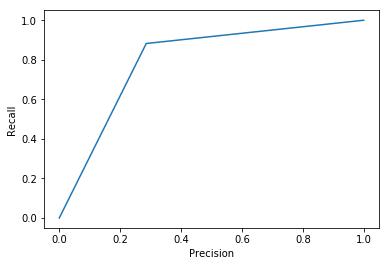

In [129]:
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(fpr,tpr)
plt.show()

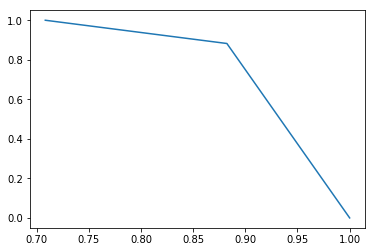

In [131]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(Test_Max_Positions,Pred_Max_Positions)
plt.plot(precision,recall)